In [1]:
import sys
!{sys.executable} -m pip install gensim

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
You should consider upgrading via the '/usr/local/opt/python@2/bin/python2.7 -m pip install --upgrade pip' command.


In [2]:
!{sys.executable} -m pip install sklearn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
You should consider upgrading via the '/usr/local/opt/python@2/bin/python2.7 -m pip install --upgrade pip' command.


In [3]:
!{sys.executable} -m pip install annoy

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
You should consider upgrading via the '/usr/local/opt/python@2/bin/python2.7 -m pip install --upgrade pip' command.


In [21]:
# import all dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [22]:
import pandas as pd

In [23]:
import os

os.getcwd()

'/Users/mani/Desktop/naacp-spark-fall2020/notebooks'

In [58]:
df = pd.read_csv("wbur2016.csv")

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,text
0,Boston Public Schools on Wednesday released th...
1,"If you read my daily forecasts, you know I oft..."
2,Massachusetts Attorney General Maura Healey ha...
3,March was a good month for the Massachusetts l...
4,Former Massachusetts House Speaker Salvatore D...


In [8]:
del df_wgbh_2017['Unnamed: 0']
del df_wgbh_2017['Article Headline']

df_wgbh_2017.head()

,Article Content
0,[A shark was discovered on a Cape Cod beach Th...
1,[President Donald Trump and the Republican maj...
2,[Barry says his firm has received comments and...
3,"[This year, the Curiosity Desk uncovered every..."
4,[Year in Review: President Trump vs. The Media...


In [9]:
df_wgbh_2017.iloc[0, 0]

'[A shark was discovered on a Cape Cod beach Thursday,\xc2\xa0making it the third this week that may have fallen victim to bitter cold temperatures., Three thresher sharks, which measure about 14 feet long,\xc2\xa0have washed up on beaches in Orleans and Wellfleet since Christmas., \xe2\x80\x9cWhat may have happened in this case is a sudden drop in temperature associated with this cold snap that we\xe2\x80\x99re all experiencing right now," said\xc2\xa0Greg Skomal of the Massachusetts Division of Marine Fisheries. "And that\xe2\x80\x99s probably caught these sharks off guard, and they\xe2\x80\x99re trying to move rapidly south. What they\xe2\x80\x99re doing is bumping into Cape Cod and getting trapped in Cape Cod Bay, and that\xe2\x80\x99s causing these issues.\xe2\x80\x9d, The three sharks died from being stranded.\xc2\xa0Skomal emphasized the strandings appear to be a natural event, and there\'s no indication of what he called "foul play." He said it\'s common for one thresher shark 

In [59]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "\xc2", "\xa0",
             "\x80", "\x9c", "\x99", "\x94", "\xad", "\xe2", "\x9d"]

for char in spec_chars:
    df['text'] = df['text'].str.replace(char, ' ')

In [11]:
df_wgbh_2017.iloc[0,0]

' A shark was discovered on a Cape Cod beach Thursday   making it the third this week that may have fallen victim to bitter cold temperatures   Three thresher sharks  which measure about 14 feet long   have washed up on beaches in Orleans and Wellfleet since Christmas      What may have happened in this case is a sudden drop in temperature associated with this cold snap that we   re all experiencing right now   said  Greg Skomal of the Massachusetts Division of Marine Fisheries   And that   s probably caught these sharks off guard  and they   re trying to move rapidly south  What they   re doing is bumping into Cape Cod and getting trapped in Cape Cod Bay  and that   s causing these issues      The three sharks died from being stranded   Skomal emphasized the strandings appear to be a natural event  and there s no indication of what he called  foul play   He said it s common for one thresher shark to strand on the Cape in a season  but three in one week is unusual      We want the folk

In [25]:
import gensim

def tokenize(text, stopwords, max_len = 20):
    return [token for token in gensim.utils.simple_preprocess(text, max_len=max_len) if token not in stopwords]

In [60]:
list_of_articles = df.values.tolist()

flat_list_of_articles = [item for sublist in list_of_articles for item in sublist]

tagged_docs = [gensim.models.doc2vec.TaggedDocument(tokenize(text, [], max_len=200), [i]) for i, text in enumerate(flat_list_of_articles)]

In [75]:
tagged_docs[1]

TaggedDocument(words=['if', 'you', 'read', 'my', 'daily', 'forecasts', 'you', 'know', 'often', 'write', 'about', 'the', 'drought', 'this', 'is', 'in', 'part', 'because', 'am', 'plant', 'lover', 'and', 'the', 'drought', 'concerns', 'me', 'but', 'the', 'drought', 'is', 'also', 'an', 'issue', 'that', 'could', 'be', 'real', 'problem', 'this', 'coming', 'spring', 'and', 'summer', 'if', 'we', 'don', 'break', 'it', 'the', 'fact', 'we', 'are', 'still', 'in', 'moderate', 'to', 'severe', 'drought', 'is', 'relevant', 'this', 'morning', 'because', 'while', 'precipitation', 'is', 'in', 'the', 'forecast', 'it', 'very', 'little', 'what', 'find', 'interesting', 'is', 'the', 'fact', 'another', 'storm', 'approaching', 'the', 'area', 'tomorrow', 'is', 'basically', 'going', 'to', 'fall', 'apart', 'as', 'it', 'gets', 'to', 'new', 'england', 'this', 'is', 'the', 'same', 'pattern', 'we', 'have', 'seen', 'for', 'months', 'and', 'months', 'today', 'is', 'sunny', 'and', 'cold', 'but', 'not', 'bitter', 'at', 'al

In [74]:
df.head()

,text
0,Boston Public Schools on Wednesday released th...
1,If you read my daily forecasts you know I oft...
2,Massachusetts Attorney General Maura Healey ha...
3,March was a good month for the Massachusetts l...
4,Former Massachusetts House Speaker Salvatore D...


In [62]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=30, epochs=40, window=2, dm=1)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [63]:
from gensim.similarities.index import AnnoyIndexer

In [64]:
annoy_index = AnnoyIndexer(model, 100)

In [65]:
vector = model.infer_vector(['black', 'african american', 'african-american', 'haitian', 'jamaican', 'west indian', 'dominican'])

print(vector)

[-0.13587362  0.19085746  0.24443737 -0.20267458 -0.2919095   0.14604779
  0.16972624 -0.26934364 -0.11204756  0.07401703  0.15104862  0.10336345
  0.09013434 -0.0973793   0.12993005  0.01371529 -0.25085622 -0.26023182
  0.07997661  0.14748424 -0.25120157 -0.28591776  0.28539467  0.45456484
  0.1312967  -0.06716534  0.20386818 -0.09517501  0.10886907  0.27776873]


In [66]:
model.docvecs[0]

array([-3.5620446 ,  1.2335634 , -0.3687461 , -0.8565549 , -0.97046995,
        2.302282  , -1.0366813 , -1.0051335 ,  0.87220246, -1.0616426 ,
        2.8025486 ,  0.9065331 , -0.91262454, -0.3757952 ,  2.926263  ,
        1.1167439 , -0.5460981 , -0.2746603 ,  1.9769176 , -1.1243252 ,
       -0.44425926, -0.7920497 ,  0.3655916 ,  0.4825657 ,  0.46062964,
        0.5167329 ,  0.40331256,  0.7798933 ,  2.5922513 ,  0.5280054 ],
      dtype=float32)

In [67]:
# The instance of AnnoyIndexer we just created is passed
approximate_neighbors = model.wv.most_similar([vector], topn=20, indexer=annoy_index)

# Neatly print the approximate_neighbors and their corresponding cosine similarity values
print("Approximate Neighbors")
for neighbor in approximate_neighbors:
    print(neighbor)

Approximate Neighbors
(769, 0.6977050006389618)
(215, 0.66461381316185)
(432, 0.6594673097133636)
(962, 0.6507521867752075)
(34, 0.6494816839694977)
(307, 0.6463627815246582)
(489, 0.6324443221092224)
(595, 0.6300408840179443)
(711, 0.6276685893535614)
(439, 0.6136347651481628)
(74, 0.6128922700881958)
(443, 0.6108016073703766)
(1089, 0.609410434961319)
(353, 0.6071135103702545)
(580, 0.606447160243988)
(375, 0.6059272289276123)
(682, 0.6036590933799744)
(1024, 0.6027660667896271)
(966, 0.5998946726322174)
(536, 0.5977711081504822)


In [78]:
tagged_docs[966]

TaggedDocument(words=['the', 'boston', 'police', 'department', 'body', 'camera', 'pilot', 'program', 'is', 'being', 'launched', 'with', 'officers', 'selected', 'by', 'department', 'consultant', 'after', 'none', 'volunteered', 'the', 'six', 'month', 'trial', 'starts', 'wednesday', 'with', 'two', 'days', 'of', 'training', 'it', 'goes', 'live', 'sept', 'the', 'officers', 'are', 'racially', 'and', 'gender', 'diverse', 'the', 'department', 'says', 'are', 'white', 'are', 'black', 'are', 'latino', 'and', 'three', 'are', 'asian', 'eighty', 'seven', 'of', 'the', 'are', 'men', 'they', 'are', 'scheduled', 'to', 'patrol', 'some', 'of', 'the', 'city', 'high', 'crime', 'neighborhoods', 'college', 'student', 'enclaves', 'and', 'tourist', 'hotspots', 'activists', 'have', 'called', 'for', 'the', 'program', 'since', 'the', 'police', 'shooting', 'of', 'michael', 'brown', 'in', 'ferguson', 'missouri', 'two', 'years', 'ago', 'the', 'naacp', 'questioned', 'why', 'disproportionately', 'high', 'number', 'of',

In [44]:
for elem in tagged_docs:
    if elem.tags[0] == 0:
        print(elem.words)

['boston', 'public', 'schools', 'on', 'wednesday', 'released', 'the', 'results', 'of', 'an', 'investigation', 'into', 'the', 'racial', 'climate', 'at', 'boston', 'latin', 'following', 'months', 'of', 'tension', 'and', 'tumult', 'at', 'the', 'elite', 'exam', 'school', 'of', 'the', 'reported', 'bias', 'based', 'incidents', 'in', 'its', 'investigation', 'the', 'bps', 'office', 'of', 'equity', 'found', 'cases', 'where', 'an', 'administrator', 'teacher', 'or', 'student', 'did', 'not', 'follow', 'district', 'policy', 'by', 'failing', 'to', 'appropriately', 'investigate', 'document', 'and', 'or', 'take', 'steps', 'to', 'prevent', 'recurrences', 'of', 'bias', 'based', 'conduct', 'these', 'cases', 'were', 'reported', 'to', 'bls', 'administration', 'or', 'the', 'office', 'of', 'equity', 'between', 'jan', 'and', 'june', 'of', 'this', 'year', 'but', 'some', 'reference', 'incidents', 'that', 'occurred', 'years', 'before', 'bps', 'found', 'six', 'cases', 'in', 'which', 'administrators', 'violated', 

In [68]:
import numpy as np

X = model.docvecs[0].reshape(1, -1)
for i in range(1, len(model.docvecs)):
    X = np.concatenate((X, model.docvecs[i].reshape(1, -1)), axis=0)
    
print(X.shape)

(1204, 30)


In [69]:
print(X)

[[-3.5620446   1.2335634  -0.3687461  ...  0.7798933   2.5922513
   0.5280054 ]
 [ 0.0564928   1.8515815   2.1334677  ...  1.1597642  -0.11891423
   0.90318805]
 [ 1.793457    0.60011286  0.37132502 ... -0.9067548   0.500205
   0.12550591]
 ...
 [-0.02441309  1.1627587   0.54162514 ...  0.828275   -1.4665989
   0.886665  ]
 [ 1.1432298   0.54978365  0.7460187  ... -2.0295298  -1.3655629
   1.1940905 ]
 [-0.37532112  1.6120595   1.4437306  ...  0.4354305  -0.02725301
  -0.05631491]]


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

# Create a new dataset from principal components 
df = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2', 'PC3'])

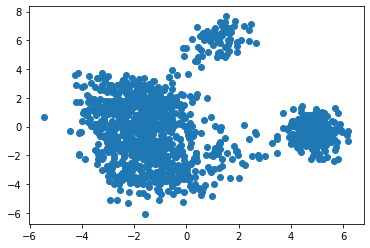

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df['PC1'], df['PC2'])
plt.show()

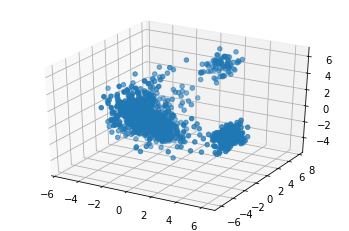

In [38]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
z = df['PC3']
y = df['PC2']
x = df['PC1']
ax.scatter3D(x, y, z)